## HOMEWORK #3

### Non linear models for classification 

In this notebook we are going to explore the use of SVM and Neural Networks (NNs) for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

The dataset consists of 70,000 images of handwritten digits (i.e., 0, 1, ... 9). Each image is 28 pixels by 28 pixels and we can think of it as a vector of 28x28 = 784 numbers. Each number is an integer between 0 and 255. For each image we have the corresponding label (i.e., 0, 1, ..., 9).

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

## TO DO 0

In [2]:
#fix your ID ("numero di matricola") and the seed for random generator
ID = 1110975
np.random.seed(ID)

Now let's load the dataset. 'data' contains the input, 'target' contains the label. We normalize the data by dividing each value by 255 so that each value is in [0,1]

In [3]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
mnist = fetch_mldata("MNIST original")
# rescale the data
X, y = mnist.data / 255., mnist.target

Now we split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [4]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
sp.stats.itemfreq(y_train)

Labels and frequencies in training dataset: 


array([[  0.,  41.],
       [  1.,  67.],
       [  2.,  51.],
       [  3.,  52.],
       [  4.,  47.],
       [  5.,  41.],
       [  6.,  50.],
       [  7.,  58.],
       [  8.,  50.],
       [  9.,  43.]])

We now provide a function to print an image in a dataset, the corresponding true label, and the index of the image in the dataset.

In [5]:
#function for plotting a digit and printing the corresponding label
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

As an example, let's print the 100-th image in X_train and the 40,000-th image in X_test and their true labels.

INPUT:


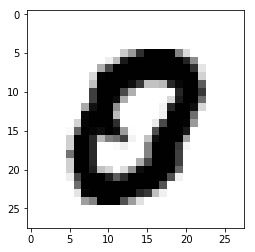

LABEL: 0
INPUT:


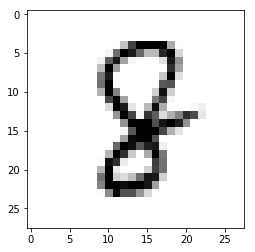

LABEL: 8


In [6]:
#let's try the plotting function
plot_digit(X_train,y_train,100)
plot_digit(X_test,y_test,40000)

## TO DO 1
Run SVM with cross validation to pick a kernel and values of parameters. Use a 5-fold cross-validation to pick the best kernel and choice of parameters. We provide some potential choice for parameters, but change the grid if needed (e.g., it takes too long). For the SVM for classificarion use SVC from sklearn.svm; for the grid search we suggest you use GridSearchCV from sklearn.model_selection, but you can implement your own cross-validation for model selection if you prefer.

Print the best parameters used as well as the best score obtained by the ``optimal'' model

In [18]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# best parameters for SVM with different kernel
# index 0: linear, index 1: polynomial, index 2: RBF
best_params_SVM = [] 

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

### FIT MODEL USING 5-fold CV
cv_linear = GridSearchCV(linear_SVM, parameters, cv=5)
cv_linear.fit(X_train, y_train)
best_params_SVM.append([cv_linear.best_score_, cv_linear.best_params_, 'linear'])

print ('RESULTS FOR LINEAR KERNEL\n')
print("Best parameters set found:")
print cv_linear.best_params_
print("Score with best parameters:")
print cv_linear.best_score_ 
print("\nAll scores on the grid:")
print cv_linear.cv_results_['mean_test_score']

# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

### DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
cv_poly = GridSearchCV(poly2_SVM, parameters, cv=5)
cv_poly.fit(X_train, y_train)
best_params_SVM.append([cv_poly.best_score_, cv_poly.best_params_, 'poly'])

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')
print("Best parameters set found:")
print cv_poly.best_params_
print("Score with best parameters:")
print cv_poly.best_score_
print("\nAll scores on the grid:")
print cv_poly.cv_results_['mean_test_score']

# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
### ADD CODE: FIT MODEL USING 5-fold CV
cv_rbf = GridSearchCV(rbf_SVM, parameters, cv=5)
cv_rbf.fit(X_train, y_train)
best_params_SVM.append([cv_rbf.best_score_, cv_rbf.best_params_, 'rbf'])

print ('\nRESULTS FOR rbf KERNEL\n')
print("Best parameters set found:")
print cv_rbf.best_params_
print("Score with best parameters:")
print cv_rbf.best_score_
print("\nAll scores on the grid:")
print cv_rbf.cv_results_['mean_test_score']

RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.818

All scores on the grid:
[ 0.818  0.818  0.818]

RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 1, 'gamma': 0.1}
Score with best parameters:
0.824

All scores on the grid:
[ 0.792  0.824  0.824  0.824  0.824  0.824  0.824  0.824  0.824]

RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.86

All scores on the grid:
[ 0.848  0.59   0.134  0.86   0.612  0.134  0.86   0.612  0.134]


## TO DO 2
For the "best" SVM kernel and choice of parameters from above, train the model on the entire training set and measure the training error. Also make predictions on the test set and measure the test error. Print the training and the test error.

In [23]:
# retrieve the parameters for the best SVM model from CV
best_score, best_index = 0., 0
for i in range(len(best_params_SVM)):
    if best_params_SVM[i][0] > best_score:
        best_score = best_params_SVM[i][0]
        best_index = i
        
best_parameters = {}
best_parameters = best_params_SVM[best_index][1]
best_parameters['kernel'] = best_params_SVM[best_index][2] 

# get training and test error for the best SVM model from CV
best_SVM = SVC(best_parameters)
best_SVM.fit(X_train, y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

{'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
Best SVM training error: 0.000000
Best SVM test error: 0.109928


### TO DO 3
Now we use feed-forward neural networks for classification. You can use the Multi-Layer-Perceptron (the feedforward/multilayer structure we have seen in class, see http://scikit-learn.org/stable/modules/neural_networks_supervised.html).

Note that we fix the starting random state so to make the runs reproducible. Use max_iter=20, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1. Pick few architectures and use the default activation function (ReLU).

REMARK: For solver ‘sgd’ max_iter determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

In [24]:
# test different architectures: 
# - 1 hidden layer with 10 nodes, 
# - 1 hidden layer with 50 nodes, 
# - 2 hidden layer with 10 nodes each, 
# - 2 hidden layer with 50 nodes each
# feel free to change this and test more/different  structures

parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp = MLPClassifier(max_iter=20, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

# ADD CODE: TRAIN NN & FIND BEST STRUCTURE (HYDDEN LAYER SIZE) USING 5-FOLD CV
cv_nn = GridSearchCV(mlp, parameters, cv=5)
cv_nn.fit(X_train, y_train)

print ('\nRESULTS FOR NN\n')
print("Best parameters set found:")
print cv_nn.best_params_
print("Score with best parameters:")
print cv_nn.best_score_
print("\nAll scores on the grid:")
print cv_nn.cv_results_['mean_test_score']

/home/luca/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50,)}
Score with best parameters:
0.67

All scores on the grid:
[ 0.504  0.67   0.424  0.564]


## TO DO 4

Now get training and test error for a NN with best parameters from above. Use verbose=True
in input so to see how loss changes in iterations (see how this changs if the number of iterations is changed)

In [28]:
# get training and test error for the best NN model from CV
parameters_nn = {'max_iter': 20, 'alpha': 1e-4, 'hidden_layer_sizes': cv_nn.best_params_['hidden_layer_sizes'],
                    'solver': 'sgd', 'tol': 1e-4, 'random_state': ID, 'learning_rate_init': .1, 'verbose': True}
mlp = MLPClassifier(**parameters_nn) 

# ADD CODE: FIT MODEL & COMPUTE TRAINING AND TEST ERRORS
mlp.fit(X_train, y_train)

training_error = 1. - mlp.score(X_train, y_train)
test_error = 1. - mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 2.23201842
Iteration 2, loss = 1.71665673
Iteration 3, loss = 1.11738868
Iteration 4, loss = 0.72773522
Iteration 5, loss = 0.52198125
Iteration 6, loss = 0.42569321
Iteration 7, loss = 0.34290507
Iteration 8, loss = 0.30266387
Iteration 9, loss = 0.24538060
Iteration 10, loss = 0.20705682
Iteration 11, loss = 0.16862676
Iteration 12, loss = 0.14460576
Iteration 13, loss = 0.12528509
Iteration 14, loss = 0.09712119
Iteration 15, loss = 0.08414897
Iteration 16, loss = 0.07293109
Iteration 17, loss = 0.06166876
Iteration 18, loss = 0.05531551
Iteration 19, loss = 0.04767693
Iteration 20, loss = 0.04313744

RESULTS FOR BEST NN

Best NN training error: 0.002000
Best NN test error: 0.159237


## TO DO 5 
According to the cross-validation results, would you choose SVMs or NNs when 500 data points are available for training? Is this a good choice, given the results on the test set?

### ANSWER 
Based on the results on cross-validation I would choose SVM since it scores better (with all kernels too). Also, given the results from the test set, SVM achieves a lower error than NN.

Note: these results may change based on the actual data in the training and test set. On different trials NN performed better with lower test error than SVM. Nonetheless, SVM had always achieved a better score.

## TO DO  6
For the sake of illustration, find and plot  (using function $plot\_digit$ from above)  a digit that is missclassified by NN and correctly classified by SVM.

INPUT:


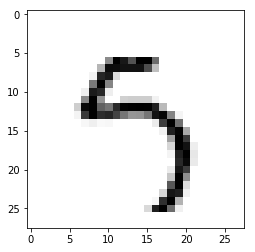

LABEL: 5
('SVM prediction: ', 5.0)
('NN prediction: ', 9.0)


In [29]:
SVM_prediction = best_SVM.predict(X_test)
NN_prediction = mlp.predict(X_test)
i = 0
found = False
while ((not found) and (i<len(y_test))):
    if (SVM_prediction[i] == y_test[i]) and (NN_prediction[i] != y_test[i]):
        plot_digit(X_test, y_test, i)
        print("SVM prediction: ", SVM_prediction[i])
        print("NN prediction: ",NN_prediction[i])
        found = True
    else:
        i += 1

## TO DO 7 (more data)

Now let's do the same but using 60000 data points for training. For SVM we are only going to use the best model we got using 500 data points. For NNs we use the same architectures as before, but you can try more if you want!

In [30]:
X = X[permutation]
y = y[permutation]

m_training = 60000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
sp.stats.itemfreq(y_train)

Labels and frequencies in training dataset: 


array([[  0.00000000e+00,   5.91400000e+03],
       [  1.00000000e+00,   6.77500000e+03],
       [  2.00000000e+00,   5.99800000e+03],
       [  3.00000000e+00,   6.14500000e+03],
       [  4.00000000e+00,   5.88300000e+03],
       [  5.00000000e+00,   5.41800000e+03],
       [  6.00000000e+00,   5.85900000e+03],
       [  7.00000000e+00,   6.23800000e+03],
       [  8.00000000e+00,   5.81600000e+03],
       [  9.00000000e+00,   5.95400000e+03]])

Let's try to use SVM with parameters obtained from the best model for m_training = 500 (using the new, larger training dataset to fit the model) Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the last TO DO cell below.

In [36]:
# get training and test error for the best SVM model from CV
parameters_SVM_large = best_parameters
parameters_SVM_large['max_iter'] = 50 # since it takes too long, I set an upper bound to the number of iterations
best_SVM_large = SVC(**parameters_SVM_large)
best_SVM_large.fit(X_train, y_train)

training_error = 1. - best_SVM_large.score(X_train, y_train)
test_error = 1. - best_SVM_large.score(X_test, y_test)

svm_or_lr = {'svm': test_error} # I'll use it later to choose between SVM or LR

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.098033
Best SVM test error: 0.104600


Just for comparison, since it may not be possible to learn a SVM, let's also use logistic regression (with standard parameters from scikit-learn, i.e. some regularization is included).

In [37]:
from sklearn import linear_model

logistic_regression_large = linear_model.LogisticRegression()
logistic_regression_large.fit(X_train, y_train)

training_error = 1. - logistic_regression_large.score(X_train, y_train)
test_error = 1. - logistic_regression_large.score(X_test, y_test)

svm_or_lr['lr'] = test_error # I'll use it later to choose between SVM or LR

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.071900
Best logistic regression test error: 0.081300


Now instead we learn NNs. Below we report the same architectures as before, feel free to try more different ones if you want, or less if it takes too much time. Describe you decisions below. (We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration.)

In [38]:
# for NN we try the same architectures as before
# Since it takes too long for all architectures, I remove two of them.
parameters_nn_large = {'max_iter': 20, 'alpha': 1e-4, 'hidden_layer_sizes': [(50,), (10,10,)], 
                       'solver': 'sgd', 'tol': 1e-4, 'random_state': ID, 'learning_rate_init': .1, 'verbose': True}
mlp_large = MLPClassifier(**parameters_nn_large)

mlp_large_CV = GridSearchCV(mlp, parameters, cv=5)
mlp_large_CV.fit(X_train, y_train) 

print ('\nRESULTS FOR NN\n')
print("Best parameters set found:")
print(mlp_large_CV.best_params_)
print("Score with best parameters:")
print(mlp_large_CV.best_score_)
print("\nAll scores on the grid:")
print(mlp_large_CV.cv_results_['mean_test_score'])

Iteration 1, loss = 0.52256385
Iteration 2, loss = 0.34114339
Iteration 3, loss = 0.31589998
Iteration 4, loss = 0.28745057
Iteration 5, loss = 0.27874590
Iteration 6, loss = 0.27030788
Iteration 7, loss = 0.26619926
Iteration 8, loss = 0.26115764
Iteration 9, loss = 0.25870638
Iteration 10, loss = 0.25791131
Iteration 11, loss = 0.25243006
Iteration 12, loss = 0.25002025
Iteration 13, loss = 0.24733372
Iteration 14, loss = 0.24629462
Iteration 15, loss = 0.24403880
Iteration 16, loss = 0.24095343
Iteration 17, loss = 0.24045521
Iteration 18, loss = 0.24016071
Iteration 19, loss = 0.23924963
Iteration 20, loss = 0.23800554
Iteration 1, loss = 0.52290915
Iteration 2, loss = 0.34276639
Iteration 3, loss = 0.32518576
Iteration 4, loss = 0.31292321
Iteration 5, loss = 0.30506484
Iteration 6, loss = 0.30018876
Iteration 7, loss = 0.29539296
Iteration 8, loss = 0.29100992
Iteration 9, loss = 0.28677965
Iteration 10, loss = 0.28331260
Iteration 11, loss = 0.28022081
Iteration 12, loss = 0.279

Iteration 1, loss = 0.55278153
Iteration 2, loss = 0.28113118
Iteration 3, loss = 0.25236253
Iteration 4, loss = 0.23820928
Iteration 5, loss = 0.28619170
Iteration 6, loss = 0.22292058
Iteration 7, loss = 0.63944969
Iteration 8, loss = 0.35482306
Iteration 9, loss = 0.47275501
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.56110634
Iteration 2, loss = 0.27086187
Iteration 3, loss = 0.33354375
Iteration 4, loss = 0.24665554
Iteration 5, loss = 0.24153247
Iteration 6, loss = 0.25716592
Iteration 7, loss = 0.21902377
Iteration 8, loss = 0.21008423
Iteration 9, loss = 0.20409173
Iteration 10, loss = 0.22549260
Iteration 11, loss = 0.19479912
Iteration 12, loss = 0.19303428
Iteration 13, loss = 0.19012974
Iteration 14, loss = 0.18655673
Iteration 15, loss = 0.18256260
Iteration 16, loss = 0.18233091
Iteration 17, loss = 0.22705545
Iteration 18, loss = 0.18387029
Iteration 19, loss = 0.18199129
Iteration 20, loss = 0.18717025

Now get training and test error for a NN with best parameters from above. Use verbose=True
in input so to see how loss changes in iterations (see how this changs if the number of iterations is changed)

In [39]:
# get training and test error for the best NN model from CV
best_parameters_mpl_large = {'max_iter': 20, 'alpha': 1e-4, 'solver': 'sgd', 'tol': 1e-4, 
                             'random_state': ID, 'learning_rate_init': .1, 'verbose': True}
best_parameters_mpl_large['hidden_layer_sizes'] = mlp_large_CV.best_params_['hidden_layer_sizes']
best_mlp_large = MLPClassifier(**best_parameters_mpl_large)
best_mlp_large.fit(X_train, y_train)

training_error = 1. - best_mlp_large.score(X_train, y_train)
test_error = 1. - best_mlp_large.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')
print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 0.32075588
Iteration 2, loss = 0.14371505
Iteration 3, loss = 0.10497255
Iteration 4, loss = 0.08706503
Iteration 5, loss = 0.07425768
Iteration 6, loss = 0.06405363
Iteration 7, loss = 0.05640603
Iteration 8, loss = 0.05108043
Iteration 9, loss = 0.04559623
Iteration 10, loss = 0.04158197
Iteration 11, loss = 0.03505335
Iteration 12, loss = 0.03281433
Iteration 13, loss = 0.02868126
Iteration 14, loss = 0.02571878
Iteration 15, loss = 0.02355611
Iteration 16, loss = 0.02069391
Iteration 17, loss = 0.01820300
Iteration 18, loss = 0.01576821
Iteration 19, loss = 0.01395867
Iteration 20, loss = 0.01334809

RESULTS FOR BEST NN

Best NN training error: 0.002067
Best NN test error: 0.025700


## TO DO 8 

Compare and discuss:
- the results from standard SVM and NN with m=60000 training data points. If you stopped the standard SVM (because it was running for too long), include such aspect in your comparison. Compare also with the results of logistic regression as well.
- the results from NN with m=500 and m=60000 training data points.

### ANSWER
First of all, I limited the number of iteration of SVM at 50 and reduced the number of architectures for CV of NN at two, otherwise the code it would take a really long time to run. With 50 iterations the block of code regarding SVM runs in at least 5 minutes on my PC. Logistic regression takes 5 minutes as well. The CV for NN with two architectures takes 5 minutes.

The results above tell us that NN with 60000 training points score better than the standard SVM (and logistic regression), both on training and test error. Also, LR performs slightly better than SVM. As said before, since I set an upper bound on the number of iterations, it is possible that SVM did not converge to the optimal solution. 

Both NN for 500 and 60000 training data points achieve better results than regular SVM. Coincidentally, the architecture is the same, however two architectures were not available for CV for NN with 60000 data points. The NN with 60000 data points achieves a better test error than the NN with 500 data points. Since the training error is the same for both NNs, the test error could be influenced by the fact that the test set for the first NN is really large compared to the one for the second NN and so it could be more likely that more points are missclassified (or it would just perform worse).

## TO DO 9 
Plot (using function $plot\_digit$ from above)  a digit that is missclassified by SVM or logistic regression and correctly classified by NN.

INPUT:


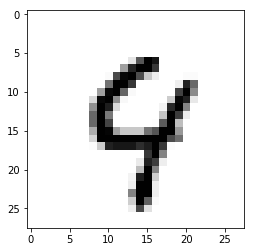

LABEL: 9
('Logistic regression prediction: ', 4.0)
('NN prediction: ', 9.0)


In [41]:
if svm_or_lr['svm'] > svm_or_lr['lr']:
    lr_svm_prediction = best_SVM_large.predict(X_test)
else:
    lr_svm_prediction = logistic_regression_large.predict(X_test)
large_NN_prediction = best_mlp_large.predict(X_test)
i = 0
found = False
while ((not found) and (i<len(y_test))):
    if (lr_svm_prediction[i] != y_test[i]) and (large_NN_prediction[i] == y_test[i]):
        plot_digit(X_test, y_test, i)
        print("Logistic regression prediction: ", lr_svm_prediction[i])
        print("NN prediction: ", large_NN_prediction[i])
        found = True
    else:
        i += 1

## TO DO 10
Plot (using function $plot\_digit$ from above)  a digit that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=60000 training data points.

INPUT:


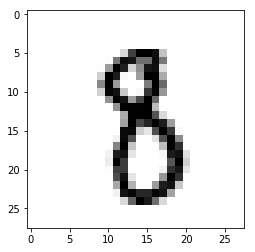

LABEL: 8
('NN prediction with training set size of 500: ', 3.0)
('NN prediction with training set size of 60000: ', 8.0)


In [42]:
NN_prediction = mlp.predict(X_test)
i = 0
found = False
while ((not found) and (i<len(y_test))):
    if (NN_prediction[i] != y_test[i]) and (large_NN_prediction[i] == y_test[i]):
        plot_digit(X_test, y_test, i)
        print("NN prediction with training set size of 500: ", NN_prediction[i])
        print("NN prediction with training set size of 60000: ", large_NN_prediction[i])
        found = True
    else:
        i += 1